## Imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
tf.get_logger().setLevel('INFO')

## Read in Data

In [53]:
df_test = pd.read_csv('../data/processed_data/test.csv')
df_train = pd.read_csv('../data/processed_data/train.csv')
df_val = pd.read_csv('../data/processed_data/validation.csv')

## Data Cleaning

In [54]:
# Choose a subset of columns (these are all numeric).
columns = ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label']

df_train = df_train[columns]
df_train.label = np.where(df_train.label == 'Road_Noises', 0, 1)
df_val = df_val[columns]
df_val.label = np.where(df_val.label == 'Road_Noises', 0, 1)
df_test_total = df_test.copy()
df_test_total.label = np.where(df_test_total.label == 'Road_Noises', 0, 1)
df_test = df_test[columns]
df_test.label = np.where(df_test.label == 'Road_Noises', 0, 1)

# Convert strings to numeric values, coercing missing values to nan.
for column in columns:
    df_train[column] = pd.to_numeric(df_train[column], errors='coerce')
    df_val[column] = pd.to_numeric(df_val[column], errors='coerce')
    df_test[column] = pd.to_numeric(df_test[column], errors='coerce')

# The dropna function drops rows with missing value(s) by default.
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()


## Feature Selection

In [55]:
features = ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20']

#standardize
scaler = StandardScaler()
df_train[features] = scaler.fit_transform(df_train[features])
df_val[features] = scaler.transform(df_val[features])
df_test[features] = scaler.transform(df_test[features])

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
df_train_features = df_train[features]
df_test_features = df_test[features]
df_train_labels = df_train['label']
df_val_labels = df_val['label']
df_test_labels = df_test['label']

# Confirm the data shapes are as expected.
print('train data shape:', df_train_features.shape)
print('train labels shape:', df_train_labels.shape)
print('test data shape:', df_test_features.shape)
print('test labels shape:', df_test_labels.shape)

train data shape: (1283, 25)
train labels shape: (1283,)
test data shape: (276, 25)
test labels shape: (276,)


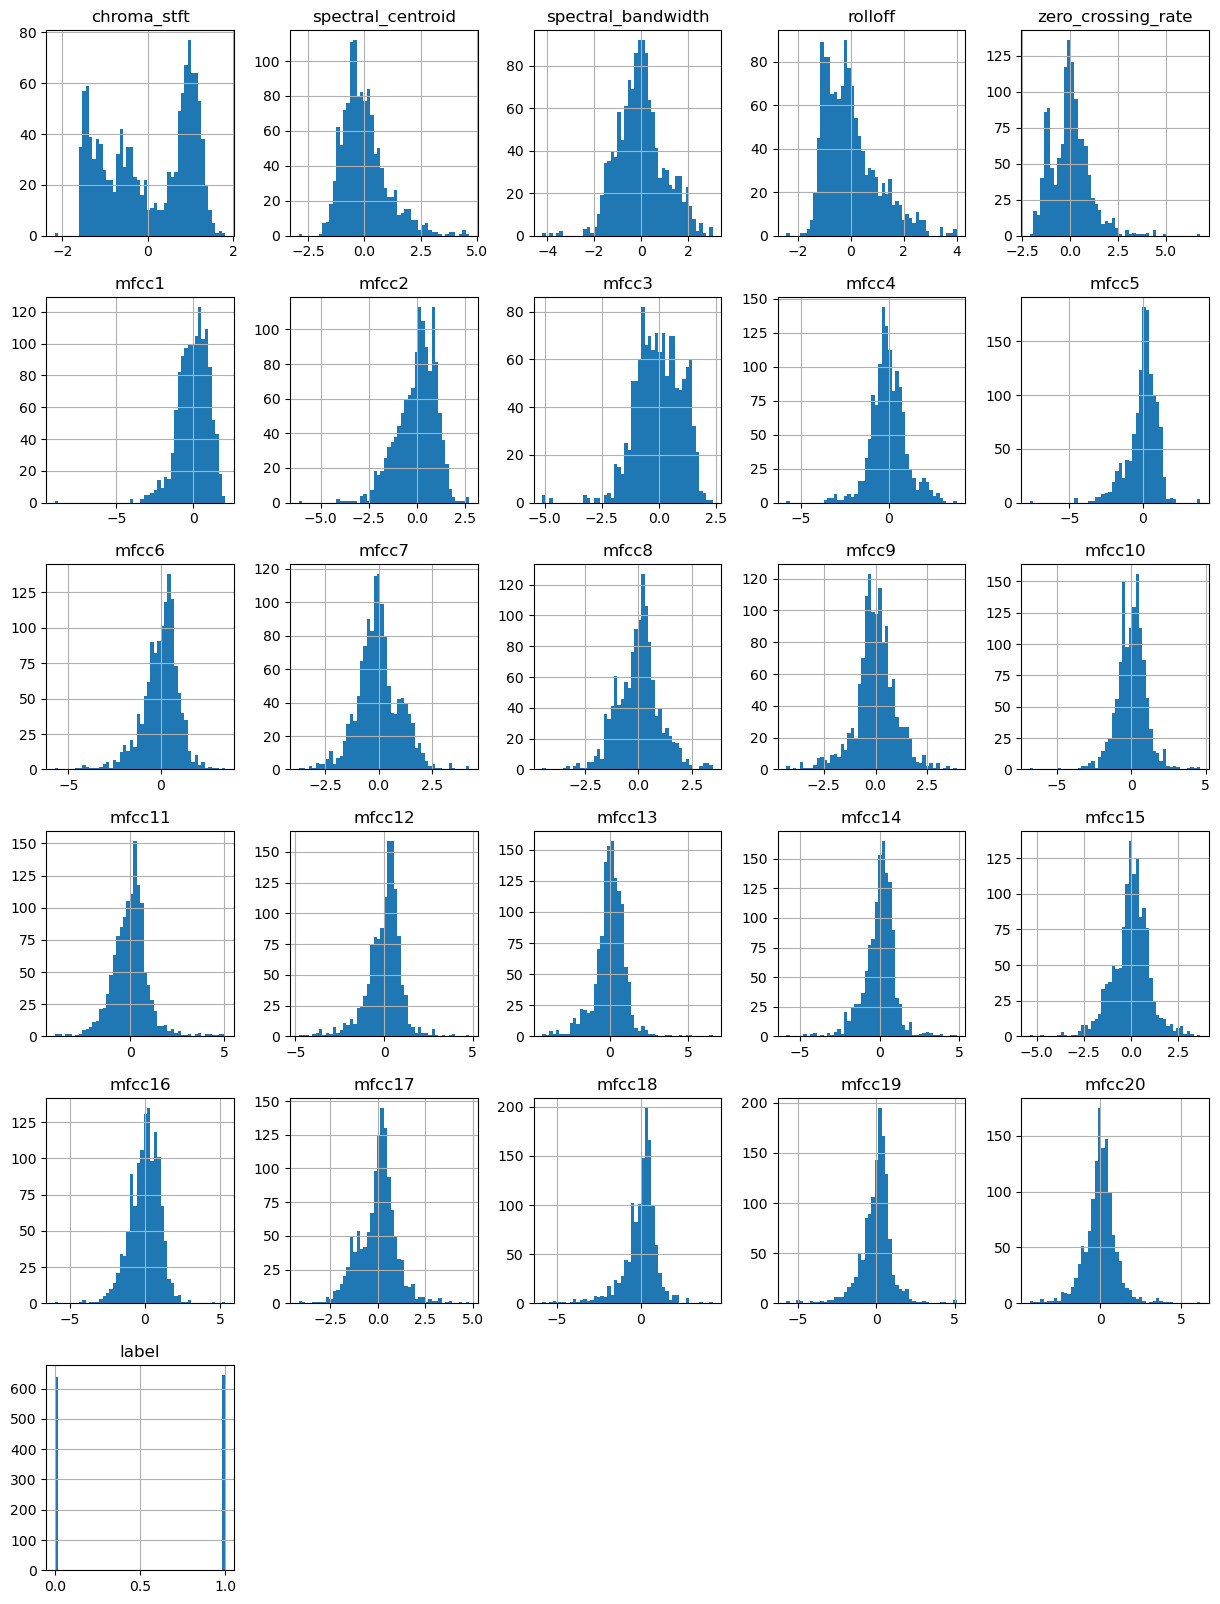

In [42]:
df_train.hist(figsize=(15, 20), bins = 50)
plt.show()

## Model Building

In [56]:
def build_model(learning_rate=0.01):
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()

    model.add(keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      use_bias=True,               # use a bias param
      activation="sigmoid"         # apply the sigmoid function!
    ))

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', 
                optimizer=optimizer, 
                metrics=[metrics.binary_accuracy])

    return model

In [57]:
# Build the model.
model = build_model()

## Model Training

In [67]:
model = build_model(learning_rate=0.01)

# Fit the model.
history = model.fit(
  x = df_train[features],   # our binary training examples
  y = df_train['label'],   # corresponding binary labels
  epochs=500,             # number of passes through the training data
  batch_size=300,        # mini-batch size
  validation_data=(df_val[features], df_val['label']), # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss 
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)

Epoch 1/500
5/5 [==============================] - 1s 62ms/step - loss: 1.0091 - binary_accuracy: 0.3671 - val_loss: 1.0009 - val_binary_accuracy: 0.3491
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 0.9689 - binary_accuracy: 0.3780 - val_loss: 0.9650 - val_binary_accuracy: 0.3527
Epoch 3/500
5/5 [==============================] - 0s 13ms/step - loss: 0.9316 - binary_accuracy: 0.3991 - val_loss: 0.9326 - val_binary_accuracy: 0.3782
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 0.8978 - binary_accuracy: 0.4186 - val_loss: 0.9016 - val_binary_accuracy: 0.3964
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 0.8653 - binary_accuracy: 0.4357 - val_loss: 0.8715 - val_binary_accuracy: 0.4291
Epoch 6/500
5/5 [==============================] - 0s 15ms/step - loss: 0.8341 - binary_accuracy: 0.4560 - val_loss: 0.8432 - val_binary_accuracy: 0.4327
Epoch 7/500
5/5 [==============================] - 0s 14ms/step - loss: 0.80

Epoch 54/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3530 - binary_accuracy: 0.8979 - val_loss: 0.4134 - val_binary_accuracy: 0.8291
Epoch 55/500
5/5 [==============================] - 0s 12ms/step - loss: 0.3502 - binary_accuracy: 0.8995 - val_loss: 0.4107 - val_binary_accuracy: 0.8327
Epoch 56/500
5/5 [==============================] - 0s 13ms/step - loss: 0.3473 - binary_accuracy: 0.8987 - val_loss: 0.4079 - val_binary_accuracy: 0.8327
Epoch 57/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3445 - binary_accuracy: 0.8987 - val_loss: 0.4053 - val_binary_accuracy: 0.8400
Epoch 58/500
5/5 [==============================] - 0s 13ms/step - loss: 0.3419 - binary_accuracy: 0.9018 - val_loss: 0.4027 - val_binary_accuracy: 0.8436
Epoch 59/500
5/5 [==============================] - 0s 10ms/step - loss: 0.3392 - binary_accuracy: 0.9026 - val_loss: 0.4002 - val_binary_accuracy: 0.8436
Epoch 60/500
5/5 [==============================] - 0s 16ms/step - los

Epoch 107/500
5/5 [==============================] - 0s 13ms/step - loss: 0.2656 - binary_accuracy: 0.9174 - val_loss: 0.3255 - val_binary_accuracy: 0.8727
Epoch 108/500
5/5 [==============================] - 0s 13ms/step - loss: 0.2647 - binary_accuracy: 0.9182 - val_loss: 0.3245 - val_binary_accuracy: 0.8800
Epoch 109/500
5/5 [==============================] - 0s 15ms/step - loss: 0.2638 - binary_accuracy: 0.9197 - val_loss: 0.3235 - val_binary_accuracy: 0.8800
Epoch 110/500
5/5 [==============================] - 0s 11ms/step - loss: 0.2628 - binary_accuracy: 0.9197 - val_loss: 0.3225 - val_binary_accuracy: 0.8800
Epoch 111/500
5/5 [==============================] - 0s 11ms/step - loss: 0.2620 - binary_accuracy: 0.9189 - val_loss: 0.3215 - val_binary_accuracy: 0.8800
Epoch 112/500
5/5 [==============================] - 0s 12ms/step - loss: 0.2611 - binary_accuracy: 0.9189 - val_loss: 0.3205 - val_binary_accuracy: 0.8836
Epoch 113/500
5/5 [==============================] - 0s 12ms/ste

5/5 [==============================] - 0s 11ms/step - loss: 0.2311 - binary_accuracy: 0.9252 - val_loss: 0.2872 - val_binary_accuracy: 0.8945
Epoch 160/500
5/5 [==============================] - 0s 23ms/step - loss: 0.2306 - binary_accuracy: 0.9252 - val_loss: 0.2867 - val_binary_accuracy: 0.8945
Epoch 161/500
5/5 [==============================] - 0s 23ms/step - loss: 0.2302 - binary_accuracy: 0.9252 - val_loss: 0.2862 - val_binary_accuracy: 0.8945
Epoch 162/500
5/5 [==============================] - 0s 16ms/step - loss: 0.2297 - binary_accuracy: 0.9252 - val_loss: 0.2857 - val_binary_accuracy: 0.8945
Epoch 163/500
5/5 [==============================] - 0s 12ms/step - loss: 0.2293 - binary_accuracy: 0.9252 - val_loss: 0.2852 - val_binary_accuracy: 0.8945
Epoch 164/500
5/5 [==============================] - 0s 15ms/step - loss: 0.2288 - binary_accuracy: 0.9252 - val_loss: 0.2846 - val_binary_accuracy: 0.8945
Epoch 165/500
5/5 [==============================] - 0s 12ms/step - loss: 0.22

5/5 [==============================] - 0s 15ms/step - loss: 0.2117 - binary_accuracy: 0.9306 - val_loss: 0.2643 - val_binary_accuracy: 0.9018
Epoch 212/500
5/5 [==============================] - 0s 14ms/step - loss: 0.2114 - binary_accuracy: 0.9306 - val_loss: 0.2639 - val_binary_accuracy: 0.9018
Epoch 213/500
5/5 [==============================] - 0s 16ms/step - loss: 0.2111 - binary_accuracy: 0.9306 - val_loss: 0.2635 - val_binary_accuracy: 0.9018
Epoch 214/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2108 - binary_accuracy: 0.9306 - val_loss: 0.2631 - val_binary_accuracy: 0.9018
Epoch 215/500
5/5 [==============================] - 0s 15ms/step - loss: 0.2105 - binary_accuracy: 0.9306 - val_loss: 0.2628 - val_binary_accuracy: 0.9018
Epoch 216/500
5/5 [==============================] - 0s 24ms/step - loss: 0.2102 - binary_accuracy: 0.9306 - val_loss: 0.2625 - val_binary_accuracy: 0.9018
Epoch 217/500
5/5 [==============================] - 0s 25ms/step - loss: 0.20

5/5 [==============================] - 0s 23ms/step - loss: 0.1990 - binary_accuracy: 0.9384 - val_loss: 0.2486 - val_binary_accuracy: 0.9055
Epoch 264/500
5/5 [==============================] - 0s 26ms/step - loss: 0.1988 - binary_accuracy: 0.9384 - val_loss: 0.2484 - val_binary_accuracy: 0.9055
Epoch 265/500
5/5 [==============================] - 0s 23ms/step - loss: 0.1986 - binary_accuracy: 0.9376 - val_loss: 0.2482 - val_binary_accuracy: 0.9055
Epoch 266/500
5/5 [==============================] - 0s 21ms/step - loss: 0.1984 - binary_accuracy: 0.9376 - val_loss: 0.2480 - val_binary_accuracy: 0.9055
Epoch 267/500
5/5 [==============================] - 0s 11ms/step - loss: 0.1982 - binary_accuracy: 0.9384 - val_loss: 0.2478 - val_binary_accuracy: 0.9055
Epoch 268/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1980 - binary_accuracy: 0.9384 - val_loss: 0.2476 - val_binary_accuracy: 0.9055
Epoch 269/500
5/5 [==============================] - 0s 15ms/step - loss: 0.19

5/5 [==============================] - 0s 25ms/step - loss: 0.1902 - binary_accuracy: 0.9415 - val_loss: 0.2378 - val_binary_accuracy: 0.9055
Epoch 316/500
5/5 [==============================] - 0s 24ms/step - loss: 0.1901 - binary_accuracy: 0.9415 - val_loss: 0.2376 - val_binary_accuracy: 0.9055
Epoch 317/500
5/5 [==============================] - 0s 22ms/step - loss: 0.1899 - binary_accuracy: 0.9415 - val_loss: 0.2373 - val_binary_accuracy: 0.9055
Epoch 318/500
5/5 [==============================] - 0s 24ms/step - loss: 0.1898 - binary_accuracy: 0.9415 - val_loss: 0.2371 - val_binary_accuracy: 0.9055
Epoch 319/500
5/5 [==============================] - 0s 26ms/step - loss: 0.1897 - binary_accuracy: 0.9415 - val_loss: 0.2370 - val_binary_accuracy: 0.9055
Epoch 320/500
5/5 [==============================] - 0s 24ms/step - loss: 0.1895 - binary_accuracy: 0.9415 - val_loss: 0.2368 - val_binary_accuracy: 0.9055
Epoch 321/500
5/5 [==============================] - 0s 17ms/step - loss: 0.18

5/5 [==============================] - 0s 17ms/step - loss: 0.1837 - binary_accuracy: 0.9454 - val_loss: 0.2296 - val_binary_accuracy: 0.9164
Epoch 368/500
5/5 [==============================] - 0s 24ms/step - loss: 0.1836 - binary_accuracy: 0.9454 - val_loss: 0.2294 - val_binary_accuracy: 0.9164
Epoch 369/500
5/5 [==============================] - 0s 24ms/step - loss: 0.1835 - binary_accuracy: 0.9454 - val_loss: 0.2292 - val_binary_accuracy: 0.9164
Epoch 370/500
5/5 [==============================] - 0s 26ms/step - loss: 0.1834 - binary_accuracy: 0.9454 - val_loss: 0.2291 - val_binary_accuracy: 0.9164
Epoch 371/500
5/5 [==============================] - 0s 26ms/step - loss: 0.1833 - binary_accuracy: 0.9454 - val_loss: 0.2289 - val_binary_accuracy: 0.9164
Epoch 372/500
5/5 [==============================] - 0s 23ms/step - loss: 0.1832 - binary_accuracy: 0.9454 - val_loss: 0.2289 - val_binary_accuracy: 0.9164
Epoch 373/500
5/5 [==============================] - 0s 26ms/step - loss: 0.18

5/5 [==============================] - 0s 24ms/step - loss: 0.1788 - binary_accuracy: 0.9454 - val_loss: 0.2231 - val_binary_accuracy: 0.9164
Epoch 420/500
5/5 [==============================] - 0s 19ms/step - loss: 0.1787 - binary_accuracy: 0.9454 - val_loss: 0.2230 - val_binary_accuracy: 0.9164
Epoch 421/500
5/5 [==============================] - 0s 28ms/step - loss: 0.1786 - binary_accuracy: 0.9454 - val_loss: 0.2229 - val_binary_accuracy: 0.9164
Epoch 422/500
5/5 [==============================] - 0s 25ms/step - loss: 0.1785 - binary_accuracy: 0.9454 - val_loss: 0.2228 - val_binary_accuracy: 0.9164
Epoch 423/500
5/5 [==============================] - 0s 26ms/step - loss: 0.1784 - binary_accuracy: 0.9454 - val_loss: 0.2227 - val_binary_accuracy: 0.9164
Epoch 424/500
5/5 [==============================] - 0s 16ms/step - loss: 0.1783 - binary_accuracy: 0.9454 - val_loss: 0.2226 - val_binary_accuracy: 0.9164
Epoch 425/500
5/5 [==============================] - 0s 24ms/step - loss: 0.17

5/5 [==============================] - 0s 14ms/step - loss: 0.1749 - binary_accuracy: 0.9478 - val_loss: 0.2182 - val_binary_accuracy: 0.9164
Epoch 472/500
5/5 [==============================] - 0s 13ms/step - loss: 0.1748 - binary_accuracy: 0.9478 - val_loss: 0.2182 - val_binary_accuracy: 0.9164
Epoch 473/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1747 - binary_accuracy: 0.9486 - val_loss: 0.2181 - val_binary_accuracy: 0.9164
Epoch 474/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1747 - binary_accuracy: 0.9486 - val_loss: 0.2180 - val_binary_accuracy: 0.9164
Epoch 475/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1746 - binary_accuracy: 0.9486 - val_loss: 0.2180 - val_binary_accuracy: 0.9164
Epoch 476/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1745 - binary_accuracy: 0.9486 - val_loss: 0.2179 - val_binary_accuracy: 0.9164
Epoch 477/500
5/5 [==============================] - 0s 10ms/step - loss: 0.174

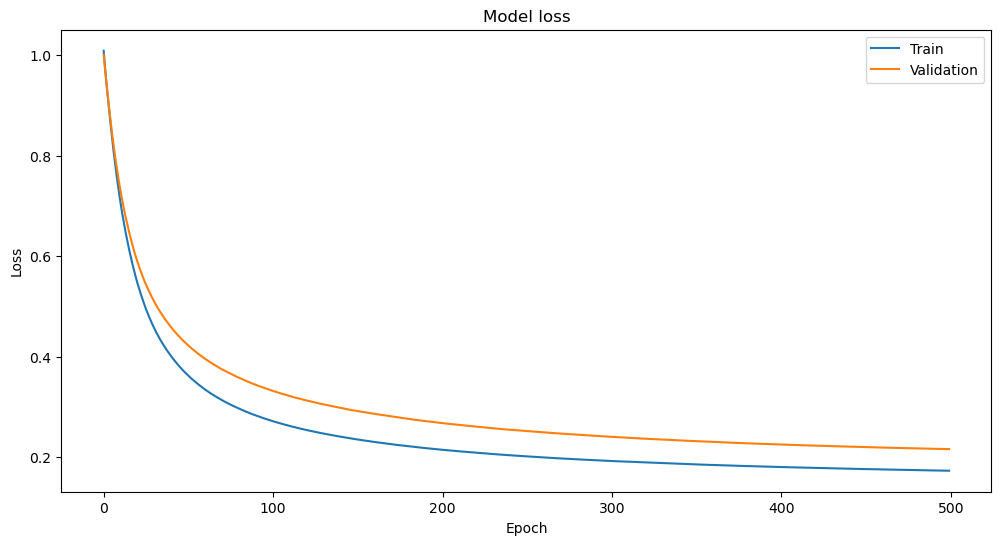

In [68]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


9/9 [==============================] - 0s 4ms/step


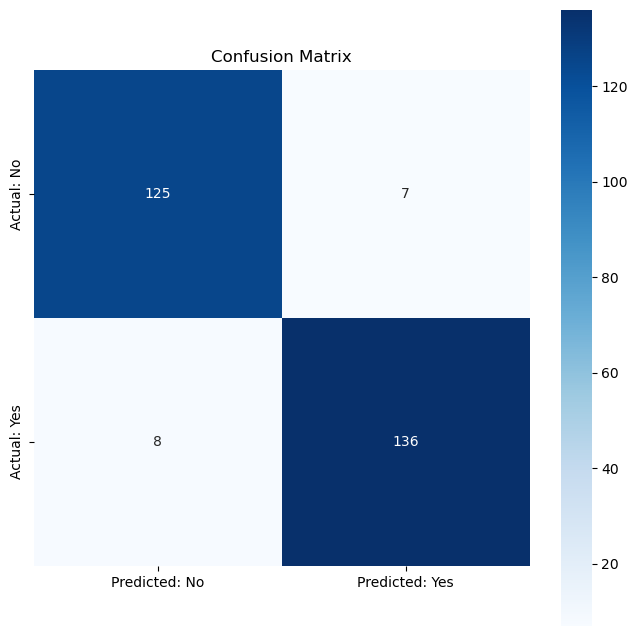

In [69]:
test_predictions = model.predict(df_test[features])
test_predictions = [1 if prob > 0.5 else 0 for prob in test_predictions]

# Compute confusion matrix
cm = confusion_matrix(df_test['label'], test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.show()


In [70]:
# Compute metrics
accuracy = accuracy_score(df_test['label'], test_predictions)
recall = recall_score(df_test['label'], test_predictions)
precision = precision_score(df_test['label'], test_predictions)
f1 = f1_score(df_test['label'], test_predictions)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

# Display the DataFrame
print(metrics_df)


   Accuracy    Recall  Precision  F1 Score
0  0.945652  0.944444   0.951049  0.947735


## Look at misclassified examples

In [71]:
df_test_total[test_predictions != df_test_total['label']]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
8,ambulance891.wav,0.662958,0.386164,580.787704,1188.815489,1321.600342,0.009512,-182.274170,150.228577,-21.447329,...,8.979539,2.912877,5.016748,6.619314,1.980104,3.337379,2.005741,4.727173,10.067710,1
25,road898.wav,0.609255,0.035360,1329.519463,1179.316892,2757.583008,0.092758,-312.035461,185.386780,-77.013168,...,-11.154863,11.061811,2.768388,-3.237181,12.355469,-0.729343,0.379765,11.360135,-3.518243,0
66,road436.wav,0.171582,0.002221,977.460161,799.911994,2032.174162,0.050880,-724.819336,8.773414,-3.269132,...,2.729169,-0.055914,1.725428,0.918635,1.984554,0.449127,1.926644,1.006860,1.399265,0
84,ambulance469.wav,0.359418,0.059367,1422.079937,1726.925902,2523.939866,0.074031,-203.251602,140.357346,-29.607054,...,10.243327,11.980643,11.296906,-10.648473,-5.826097,-0.129197,7.918193,-10.904247,-2.920857,1
106,road515.wav,0.425044,0.172105,2604.841852,1956.524004,4646.699594,0.167353,-16.660328,77.458626,-69.010628,...,7.456515,-3.318751,4.363292,-7.796032,-5.408078,-6.794962,0.450079,-1.688107,5.290003,0
121,road576.wav,0.577717,0.119025,1080.725194,989.123459,1847.439952,0.077264,-148.171463,228.274948,-82.456650,...,-9.948861,9.237173,-5.095246,-3.624642,-0.080666,-6.353147,3.347563,0.222449,3.401783,0
132,ambulance598.wav,0.400787,0.108198,2729.016555,2278.036040,5368.393179,0.158250,-59.499870,61.513187,-65.117012,...,-6.387851,-12.429326,-10.349634,-13.014932,-6.530192,-11.650452,-2.270958,-7.613408,-1.616426,1
154,road533.wav,0.373077,0.179876,2747.024753,2434.604309,5477.218675,0.144024,-13.357920,68.463715,-44.077560,...,-5.009364,-3.954839,2.047826,-0.469273,4.526023,-4.185792,4.204150,0.668636,2.388048,0
159,road534.wav,0.386525,0.204548,2453.270060,2230.123595,4752.212290,0.124425,-16.460701,75.989555,-52.857098,...,0.590161,-2.595023,-1.810333,-8.655435,-4.077652,-10.934803,-0.625434,-0.629231,-2.998398,0
160,road536.wav,0.319320,0.258057,2913.309564,2308.700770,5442.185810,0.163702,-3.719182,50.821388,-53.479794,...,-9.590231,-17.097822,-3.879916,-4.373397,0.564216,-9.560952,-4.649287,-6.099102,-4.559189,0


## PCA

In [72]:
train_feature_matrix = df_train[['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']].values

test_feature_matrix = df_test[['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']].values

# create an instance of the PCA class
pca = PCA(n_components=2)

# fit the data using the original X_train_std data; tranform X_train_std data
X_train_pca_skl = pca.fit_transform(train_feature_matrix)

# transform the X_test_std data
X_test_pca_skl = pca.transform(test_feature_matrix)

Text(0, 0.5, 'PCA2')

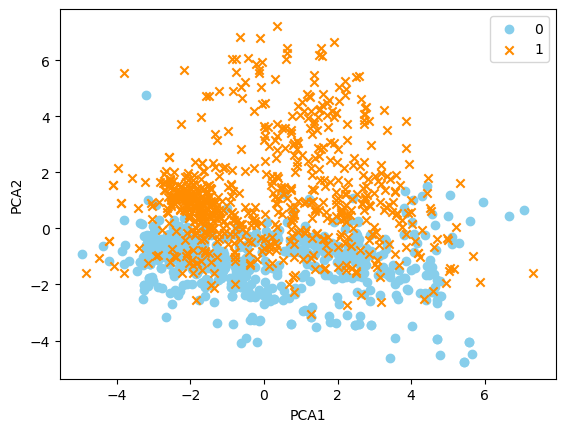

In [73]:
colors = ['skyblue', 'darkorange']
markers = ['o', 'x']

# plot
for class_value, color, marker in zip(np.unique(df_train.label.values), colors, markers):
    plt.scatter(X_train_pca_skl[df_train.label.values==class_value, 0],
                X_train_pca_skl[df_train.label.values==class_value, 1],
                color = color, label = class_value, marker=marker)
    
# legend, axes
plt.legend(loc='best')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

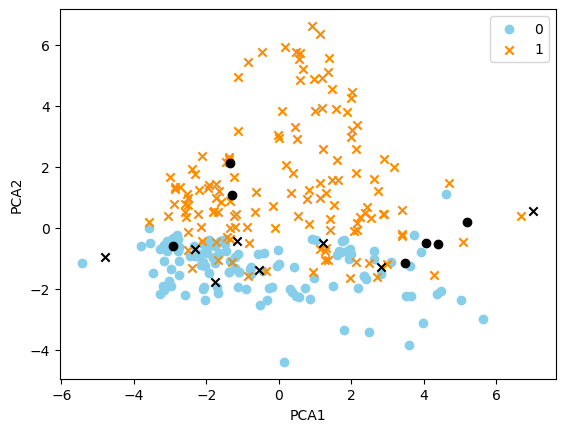

In [74]:
colors = ['skyblue', 'darkorange', 'darkred']
markers = ['o', 'x']

mis_categorized_indices = np.where(test_predictions != df_test.label.values)[0]
correct_indices = np.where(test_predictions == df_test.label.values)[0]

# plot correctly categorized samples
for class_value, color, marker in zip(np.unique(df_test.label.values), colors, markers):
    indices = np.intersect1d(np.where(df_test.label.values == class_value), correct_indices)
    plt.scatter(X_test_pca_skl[indices, 0],
                X_test_pca_skl[indices, 1],
                color=color, marker=marker, label = class_value)

# plot mis-categorized samples with same markers but different color
for class_value, marker in zip(np.unique(df_test.label.values), markers):
    indices = np.intersect1d(np.where(df_test.label.values == class_value), mis_categorized_indices)
    plt.scatter(X_test_pca_skl[indices, 0],
                X_test_pca_skl[indices, 1],
                color='black', marker=marker)

# legend, axes
plt.legend(loc='best')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

## Predictions

In [75]:
pd.DataFrame(model.predict(df_test[features])).to_csv('../Data/model_predictions/Logistic_Regression')

9/9 [==============================] - 0s 3ms/step
